# Visualization of random profiles generated as negative class in SVM
Example on how to generate random profiles. The following parameters control the profiles created:

`rpg.get_random_profiles(prof_num=10, envelope=envelope,conf=conf, dist='randn')`

 - envelope:  RandomProfileGenerator.SCREENING = 0, RandomProfileGenerator.TRUSTED = 1 or RandomProfileGenerator.PROFILE = 2
 - conf: confidence interval: RandomProfileGenerator._95 or RandomProfileGenerator._99
 - prof_num: integer from 1 to n, the number of profiles desired
 - dist: 
  - 'rand' for a uniform distribution in the range (-envelope, envelope] for each system:readout
  - 'randn' for normal distribution with sigma value calculated from conf. 

<center>
for conf = 0.95 => Z = 1.96    
for conf = 0.99 => Z = 2.765    
       
$ Z = \frac{(x - \mu)}{\sigma}$    


with $ \mu = 0 :$ 
<br>
<big>

 $ \sigma = \frac{Z}{x} $ 
</big>
</center>



Current working dir: C:\Users\antalb\PycharmProjects\SVM\Notebooks


,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,...,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,0.014625,-0.004793,0.010475,0.048916,-0.005661,-0.005957,0.047715,0.015811,-0.014530,0.016072,...,-0.083818,0.017306,0.001450,-0.010921,0.003519,-0.046830,-0.005992,0.009187,0.063338,-0.010291
1,-0.023805,-0.017393,0.014805,0.010559,-0.012809,0.013060,0.002933,0.019956,-0.021728,-0.009706,...,-0.038116,0.013824,-0.016236,0.028749,0.044435,-0.019336,0.026277,0.010619,0.035231,0.037665
2,-0.007225,-0.026127,-0.014387,-0.026202,-0.001864,0.008680,0.008360,0.017042,0.000402,0.043057,...,0.016157,0.018229,-0.019995,-0.012218,-0.018215,-0.015393,0.048154,0.010418,-0.054038,0.018226
3,0.062485,0.035789,-0.024573,-0.015552,0.030632,-0.018006,0.013410,0.015959,-0.028688,-0.001763,...,0.037054,0.016669,0.010397,0.022951,-0.000470,-0.021140,0.002068,-0.017420,0.041791,-0.002920
4,-0.024306,-0.011140,0.006679,-0.018105,-0.019880,0.006200,0.007401,-0.010444,-0.014578,0.006874,...,0.022768,-0.023681,-0.025556,0.046668,0.012745,-0.017635,0.042308,0.002976,0.050541,0.001341
5,0.060676,0.060846,-0.004027,0.031204,0.015604,0.034823,-0.029154,0.014134,0.032757,-0.052098,...,0.048732,0.011347,-0.017279,-0.006952,-0.033582,-0.032580,0.025262,0.049119,-0.059939,0.011179
6,-0.019157,-0.016885,-0.009581,-0.027749,0.001173,-0.021143,0.008172,-0.001035,-0.007395,-0.026884,...,-0.047307,0.024083,0.005639,-0.015169,0.024268,0.053500,0.004960,0.006385,-0.019687,-0.016875
7,0.024448,-0.029675,0.001157,-0.015341,0.011581,0.008490,0.031349,-0.010507,-0.008352,-0.028993,...,-0.001048,-0.011442,-0.011875,0.003887,-0.009779,0.035436,-0.072307,0.028078,0.053404,-0.041172
8,-0.010090,-0.012875,-0.022764,-0.024981,-0.026852,0.044585,0.028271,0.026197,0.022335,-0.033445,...,0.005976,-0.015905,-0.010187,-0.051379,-0.035408,-0.031847,-0.026617,0.027104,-0.040689,0.052272
9,0.014525,0.006407,-0.013883,0.022492,-0.013918,0.003104,0.077351,-0.001979,0.035569,-0.020830,...,-0.043016,-0.019343,-0.016727,-0.028044,-0.001330,0.005518,0.042291,-0.025682,0.042185,-0.004249


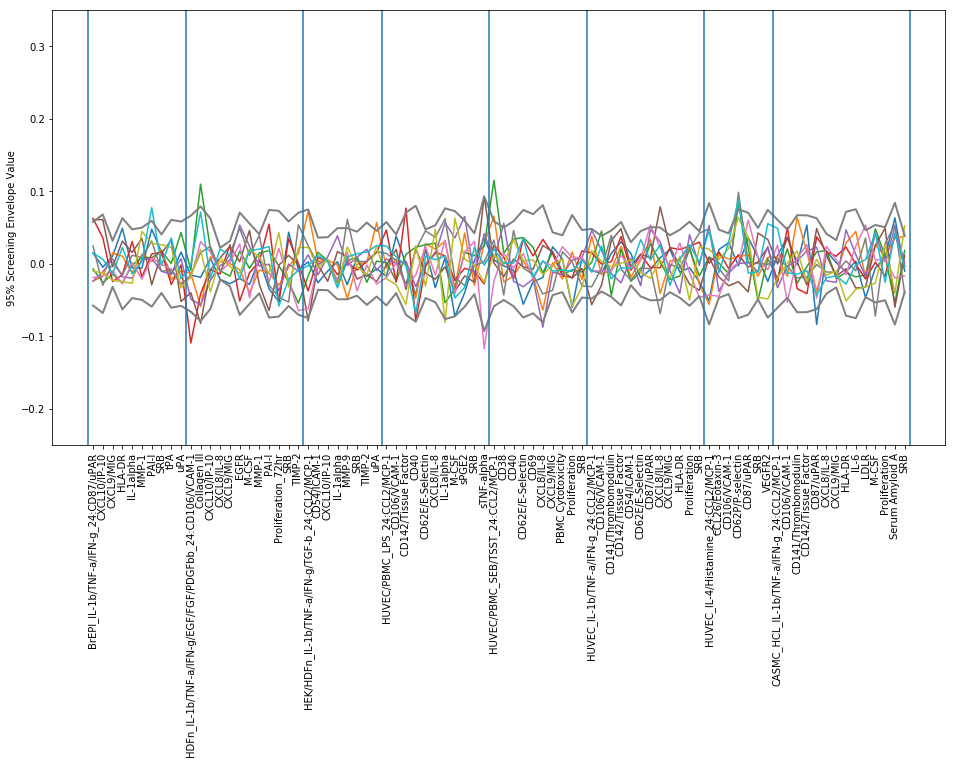

In [12]:
import numpy as np
import pandas as pd
from random_profiles import RandomProfileGenerator
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
import os
print("Current working dir: {}".format(os.getcwd()))

# Initialize the random profile genearator with sig env values and profile data file for S:M
rpg = RandomProfileGenerator(envelope_file='SigEnvelopeFile.xml', data_file='SVMData.xlsx')

envelope=RandomProfileGenerator.TRUSTED 
conf=RandomProfileGenerator._95
rp_df = rpg.get_random_profiles(prof_num=10, envelope=envelope,conf=conf, dist='randn')
screen_envelope = rpg.get_envelope(envelope=envelope,conf=conf)

plt.figure(figsize=(16,8))
display(rp_df)

#########################
## Plot Random Profiles #
#########################
system_markers = rp_df.columns.values
r_profiles = rp_df.values.tolist()
for row in r_profiles:
    # plt.scatter(x, r_profiles[rp], s=np.abs(5000*np.power(r_profiles[rp],2))) # plot controlling size
    plt.plot(range(len(row)), row) # plot controlling size
    

## Plot envelope
envelope_values = np.array([float(screen_envelope[sm]) for sm in system_markers])
x = range(len(envelope_values))
plt.plot(x, envelope_values, 
         x, -envelope_values, c='gray', linewidth=2)


x_labels = []
last_sys = ""
systems = []
v_line_positions = []

for i, sm in enumerate(system_markers):
    s,m = sm.split(':')
    #x_labels.append(m)
    if (last_sys != s):
        x_labels.append("{}:{}".format(s,m))            
        last_sys = s
        systems.append(s)
        v_line_positions.append(i)
    else:
        x_labels.append(m)
            
    
v_line_positions.append(len(system_markers))


plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('95% Screening Envelope Value');
plt.ylim(-0.25,0.35)

# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)